In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [265]:
df=pd.read_csv('Final_data.csv')
df.head()

,Unnamed: 0,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,0,1st week,Meghalaya,East Jaintia Hills,Acute Diarrhoeal Disease,160,NaN,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,1,2nd week,Maharashtra,Gadchiroli,Malaria,7,2.0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,2,3rd week,Tamil Nadu,Pudukottai,Acute Diarrhoeal Disease,8,NaN,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,3,3rd week,Gujarat,Patan,Acute Diarrhoeal Disease,7,NaN,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,4,3rd week,Kerala,Ernakulam,Acute Diarrhoeal Disease,14,NaN,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [266]:
df.shape

(8985, 15)

In [267]:
df.isnull().sum()

Unnamed: 0             0
week_of_outbreak       0
state_ut               0
district               0
Disease                0
Cases                  0
Deaths              6431
day                    0
mon                    0
year                   0
Latitude               0
Longitude              0
preci                136
LAI                 2195
Temp                 938
dtype: int64

In [268]:
df['Deaths'] = df['Deaths'].map(lambda x: 0 if pd.isna(x) else x)
df.head()

,Unnamed: 0,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,0,1st week,Meghalaya,East Jaintia Hills,Acute Diarrhoeal Disease,160,0.0,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,1,2nd week,Maharashtra,Gadchiroli,Malaria,7,2.0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,2,3rd week,Tamil Nadu,Pudukottai,Acute Diarrhoeal Disease,8,0.0,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,3,3rd week,Gujarat,Patan,Acute Diarrhoeal Disease,7,0.0,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,4,3rd week,Kerala,Ernakulam,Acute Diarrhoeal Disease,14,0.0,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [269]:
df['Cases'] = pd.to_numeric(X['Cases'], errors='coerce')  # converts invalid strings to NaN

In [270]:
df.isnull().sum()

Unnamed: 0             0
week_of_outbreak       0
state_ut               0
district               0
Disease                0
Cases                  0
Deaths                 0
day                    0
mon                    0
year                   0
Latitude               0
Longitude              0
preci                136
LAI                 2195
Temp                 938
dtype: int64

In [271]:
df[['preci', 'LAI', 'Temp']].isna().sum()


preci     136
LAI      2195
Temp      938
dtype: int64

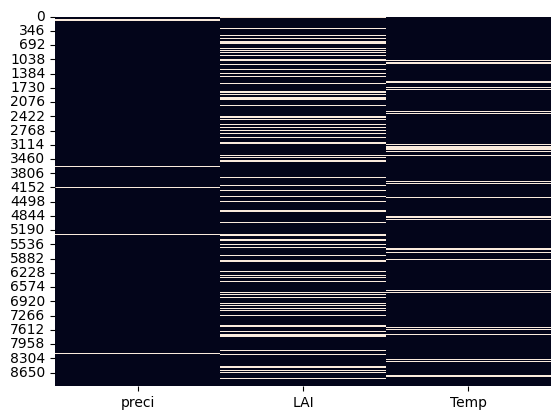

In [272]:
sns.heatmap(df[['preci', 'LAI', 'Temp']].isna(), cbar=False)
plt.show()


In [273]:
df['preci'] = df.groupby('district')['preci'].transform(lambda x: x.fillna(x.median()))
df['LAI'] = df.groupby('district')['LAI'].transform(lambda x: x.fillna(x.median()))
df['Temp'] = df.groupby('district')['Temp'].transform(lambda x: x.fillna(x.median()))

c:\Users\bguna\anaconda3\envs\py310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\bguna\anaconda3\envs\py310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\bguna\anaconda3\envs\py310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\bguna\anaconda3\envs\py310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\bguna\anaconda3\envs\py310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\bguna\anaconda3\envs\py310\lib\site-packages\numpy\lib\_nanfunctio

In [274]:
df.isnull().sum()

Unnamed: 0            0
week_of_outbreak      0
state_ut              0
district              0
Disease               0
Cases                 0
Deaths                0
day                   0
mon                   0
year                  0
Latitude              0
Longitude             0
preci               136
LAI                  49
Temp                 53
dtype: int64

In [275]:
df['preci'] = df['preci'].fillna(df['preci'].median())
df['LAI'] = df['LAI'].fillna(df['LAI'].median())
df['Temp'] = df['Temp'].fillna(df['Temp'].median())

In [276]:
df.isnull().sum()

Unnamed: 0          0
week_of_outbreak    0
state_ut            0
district            0
Disease             0
Cases               0
Deaths              0
day                 0
mon                 0
year                0
Latitude            0
Longitude           0
preci               0
LAI                 0
Temp                0
dtype: int64

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8985 entries, 0 to 8984
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8985 non-null   int64  
 1   week_of_outbreak  8985 non-null   object 
 2   state_ut          8985 non-null   object 
 3   district          8985 non-null   object 
 4   Disease           8985 non-null   object 
 5   Cases             8985 non-null   float64
 6   Deaths            8985 non-null   float64
 7   day               8985 non-null   int64  
 8   mon               8985 non-null   int64  
 9   year              8985 non-null   int64  
 10  Latitude          8985 non-null   float64
 11  Longitude         8985 non-null   float64
 12  preci             8985 non-null   float64
 13  LAI               8985 non-null   float64
 14  Temp              8985 non-null   float64
dtypes: float64(7), int64(4), object(4)
memory usage: 1.0+ MB


In [278]:
df.head()

,Unnamed: 0,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,0,1st week,Meghalaya,East Jaintia Hills,Acute Diarrhoeal Disease,160.0,0.0,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,1,2nd week,Maharashtra,Gadchiroli,Malaria,7.0,2.0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,2,3rd week,Tamil Nadu,Pudukottai,Acute Diarrhoeal Disease,8.0,0.0,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,3,3rd week,Gujarat,Patan,Acute Diarrhoeal Disease,7.0,0.0,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,4,3rd week,Kerala,Ernakulam,Acute Diarrhoeal Disease,14.0,0.0,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [279]:
for col in df.columns:
    if col:
        print(f"{col}: {df[col].nunique()} unique values")

Unnamed: 0: 8985 unique values
week_of_outbreak: 53 unique values
state_ut: 36 unique values
district: 791 unique values
Disease: 22 unique values
Cases: 523 unique values
Deaths: 43 unique values
day: 31 unique values
mon: 12 unique values
year: 14 unique values
Latitude: 716 unique values
Longitude: 726 unique values
preci: 7904 unique values
LAI: 82 unique values
Temp: 4911 unique values


In [280]:
df.drop(columns=['Unnamed: 0'],axis=0,inplace=True)

In [281]:
df1=df.copy()
df1.drop(columns=['Disease'],axis=0,inplace=True)
df1.head()

,week_of_outbreak,state_ut,district,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,1st week,Meghalaya,East Jaintia Hills,160.0,0.0,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,2nd week,Maharashtra,Gadchiroli,7.0,2.0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,3rd week,Tamil Nadu,Pudukottai,8.0,0.0,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,3rd week,Gujarat,Patan,7.0,0.0,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,3rd week,Kerala,Ernakulam,14.0,0.0,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [282]:
df.head()

,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,1st week,Meghalaya,East Jaintia Hills,Acute Diarrhoeal Disease,160.0,0.0,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,2nd week,Maharashtra,Gadchiroli,Malaria,7.0,2.0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,3rd week,Tamil Nadu,Pudukottai,Acute Diarrhoeal Disease,8.0,0.0,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,3rd week,Gujarat,Patan,Acute Diarrhoeal Disease,7.0,0.0,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,3rd week,Kerala,Ernakulam,Acute Diarrhoeal Disease,14.0,0.0,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [283]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

In [284]:
ordinal=OrdinalEncoder()
label=LabelEncoder()
scaler=StandardScaler()

In [285]:
df['week_of_outbreak'] = ordinal.fit_transform(df[['week_of_outbreak']])
df['district'] = label.fit_transform(df['district'])

In [ ]:
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap
state_encoded = ohe.fit_transform(df[['state_ut']])
state_encoded_df = pd.DataFrame(state_encoded, columns=ohe.get_feature_names_out(['state_ut']))
# Concatenate and drop original column
df = pd.concat([df.drop(columns=['state_ut']), state_encoded_df], axis=1)


In [287]:
y_encoded = label.fit_transform(df['Disease'])

In [288]:
print(label.classes_)

['Acute Diarrhoeal Disease' 'Acute Encephalitis Syndrome'
 'Acute Gastroenteritis' 'Chikungunya' 'Chikungunya/ Dengue'
 'Chikungunya/Dengue' 'Cholera' 'Dengue' 'Dengue And Chikungunya'
 'Dengue And Malaria' 'Dengue Chikungunya' 'Dengue Fever'
 'Dengue/Chikungunya' 'Diarrhea' 'Gastroenteritis' 'Malaria'
 'Malaria (PV)' 'Suspected Chikungunya' 'Suspected Cholera'
 'Suspected Dengue' 'Suspected Dengue And Chikungunya'
 'pyrexia of unknown origin']


In [289]:
df.head()

,week_of_outbreak,district,Disease,Cases,Deaths,day,mon,year,Latitude,Longitude,...,state_ut_Puducherry,state_ut_Punjab,state_ut_Rajasthan,state_ut_Sikkim,state_ut_Tamil Nadu,state_ut_Telangana,state_ut_Tripura,state_ut_Uttar Pradesh,state_ut_Uttarakhand,state_ut_West Bengal
0,10.0,215,Acute Diarrhoeal Disease,160.0,0.0,2,1,2022,25.251576,92.484050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21.0,232,Malaria,7.0,2.0,10,1,2022,19.759070,80.162281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32.0,546,Acute Diarrhoeal Disease,8.0,0.0,18,1,2022,10.382651,78.819126,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,32.0,528,Acute Diarrhoeal Disease,7.0,0.0,11,1,2022,23.774057,71.683735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,221,Acute Diarrhoeal Disease,14.0,0.0,24,12,2021,9.984080,76.274146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:
for col in df.columns:
    if col:
        print(col)

week_of_outbreak
district
Disease
Cases
Deaths
day
mon
year
Latitude
Longitude
preci
LAI
Temp
state_ut_Andhra Pradesh
state_ut_Arunachal Pradesh
state_ut_Assam
state_ut_Bihar
state_ut_Chandigarh
state_ut_Chhattisgarh
state_ut_Dadra and Nagar Haveli
state_ut_Daman and Diu
state_ut_Delhi
state_ut_Goa
state_ut_Gujarat
state_ut_Haryana
state_ut_Himachal Pradesh
state_ut_Jammu and Kashmir
state_ut_Jharkhand
state_ut_Karnataka
state_ut_Kerala
state_ut_Lakshadweep
state_ut_Madhya Pradesh
state_ut_Maharashtra
state_ut_Manipur
state_ut_Meghalaya
state_ut_Mizoram
state_ut_Nagaland
state_ut_Odisha
state_ut_Puducherry
state_ut_Punjab
state_ut_Rajasthan
state_ut_Sikkim
state_ut_Tamil Nadu
state_ut_Telangana
state_ut_Tripura
state_ut_Uttar Pradesh
state_ut_Uttarakhand
state_ut_West Bengal


In [291]:
df.head()

,week_of_outbreak,district,Disease,Cases,Deaths,day,mon,year,Latitude,Longitude,...,state_ut_Puducherry,state_ut_Punjab,state_ut_Rajasthan,state_ut_Sikkim,state_ut_Tamil Nadu,state_ut_Telangana,state_ut_Tripura,state_ut_Uttar Pradesh,state_ut_Uttarakhand,state_ut_West Bengal
0,10.0,215,Acute Diarrhoeal Disease,160.0,0.0,2,1,2022,25.251576,92.484050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21.0,232,Malaria,7.0,2.0,10,1,2022,19.759070,80.162281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32.0,546,Acute Diarrhoeal Disease,8.0,0.0,18,1,2022,10.382651,78.819126,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,32.0,528,Acute Diarrhoeal Disease,7.0,0.0,11,1,2022,23.774057,71.683735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,221,Acute Diarrhoeal Disease,14.0,0.0,24,12,2021,9.984080,76.274146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
X=df.drop('Disease',axis=1)
y=y_encoded

In [293]:
X.head()

,week_of_outbreak,district,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,...,state_ut_Puducherry,state_ut_Punjab,state_ut_Rajasthan,state_ut_Sikkim,state_ut_Tamil Nadu,state_ut_Telangana,state_ut_Tripura,state_ut_Uttar Pradesh,state_ut_Uttarakhand,state_ut_West Bengal
0,10.0,215,160.0,0.0,2,1,2022,25.251576,92.484050,0.020354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21.0,232,7.0,2.0,10,1,2022,19.759070,80.162281,0.007479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32.0,546,8.0,0.0,18,1,2022,10.382651,78.819126,0.107413,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,32.0,528,7.0,0.0,11,1,2022,23.774057,71.683735,0.065094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,221,14.0,0.0,24,12,2021,9.984080,76.274146,0.041256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [294]:
y

array([ 0, 15,  0, ...,  7,  3,  7])

In [295]:
X.dtypes

week_of_outbreak                   float64
district                             int64
Cases                              float64
Deaths                             float64
day                                  int64
mon                                  int64
year                                 int64
Latitude                           float64
Longitude                          float64
preci                              float64
LAI                                float64
Temp                               float64
state_ut_Andhra Pradesh            float64
state_ut_Arunachal Pradesh         float64
state_ut_Assam                     float64
state_ut_Bihar                     float64
state_ut_Chandigarh                float64
state_ut_Chhattisgarh              float64
state_ut_Dadra and Nagar Haveli    float64
state_ut_Daman and Diu             float64
state_ut_Delhi                     float64
state_ut_Goa                       float64
state_ut_Gujarat                   float64
state_ut_Ha

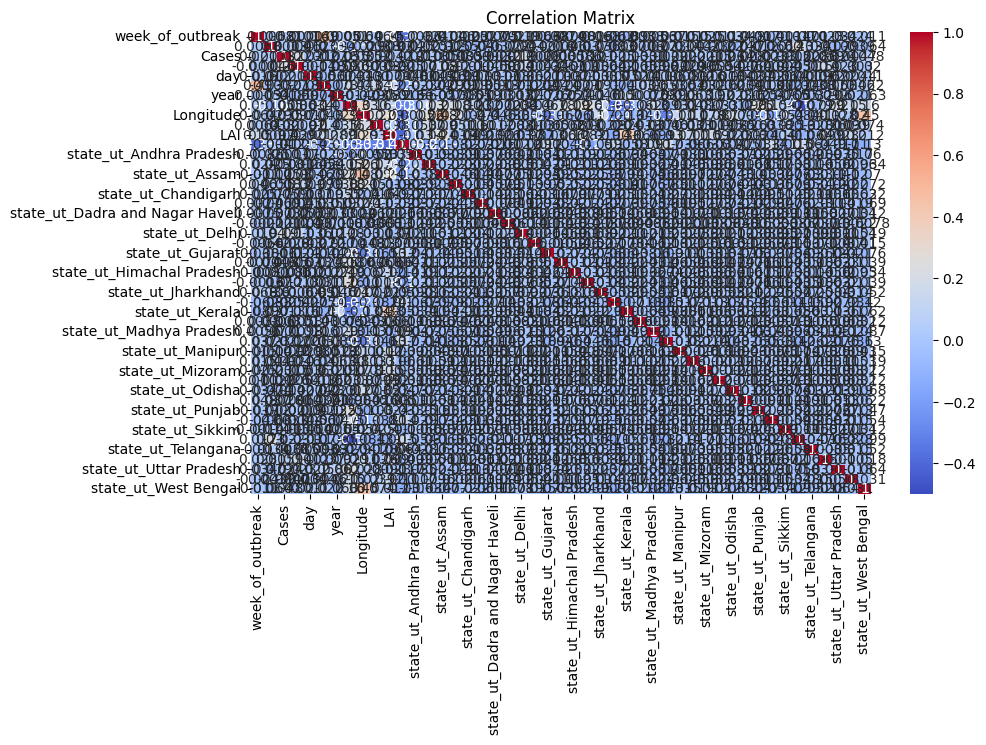

In [296]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [298]:
X['Cases'] = X['Cases'].map(lambda x: 0 if pd.isna(x) else x)


In [299]:
num_col=['Latitude', 'Longitude','preci', 'LAI', 'Temp']
X[num_col] = scaler.fit_transform(X[num_col])

In [300]:
X.head()

,week_of_outbreak,district,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,...,state_ut_Puducherry,state_ut_Punjab,state_ut_Rajasthan,state_ut_Sikkim,state_ut_Tamil Nadu,state_ut_Telangana,state_ut_Tripura,state_ut_Uttar Pradesh,state_ut_Uttarakhand,state_ut_West Bengal
0,10.0,215,160.0,0.0,2,1,2022,0.788102,2.170844,-0.701654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21.0,232,7.0,2.0,10,1,2022,-0.147121,0.008490,-0.722270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32.0,546,8.0,0.0,18,1,2022,-1.743667,-0.227221,-0.562250,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,32.0,528,7.0,0.0,11,1,2022,0.536521,-1.479416,-0.630013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,221,14.0,0.0,24,12,2021,-1.811533,-0.673842,-0.668184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [302]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [303]:
from sklearn.metrics import accuracy_score

In [304]:
X_train.isnull().sum()

week_of_outbreak                   0
district                           0
Cases                              0
Deaths                             0
day                                0
mon                                0
year                               0
Latitude                           0
Longitude                          0
preci                              0
LAI                                0
Temp                               0
state_ut_Andhra Pradesh            0
state_ut_Arunachal Pradesh         0
state_ut_Assam                     0
state_ut_Bihar                     0
state_ut_Chandigarh                0
state_ut_Chhattisgarh              0
state_ut_Dadra and Nagar Haveli    0
state_ut_Daman and Diu             0
state_ut_Delhi                     0
state_ut_Goa                       0
state_ut_Gujarat                   0
state_ut_Haryana                   0
state_ut_Himachal Pradesh          0
state_ut_Jammu and Kashmir         0
state_ut_Jharkhand                 0
s

In [309]:
X_train.columns

Index(['week_of_outbreak', 'district', 'Cases', 'Deaths', 'day', 'mon', 'year',
       'Latitude', 'Longitude', 'preci', 'LAI', 'Temp',
       'state_ut_Andhra Pradesh', 'state_ut_Arunachal Pradesh',
       'state_ut_Assam', 'state_ut_Bihar', 'state_ut_Chandigarh',
       'state_ut_Chhattisgarh', 'state_ut_Dadra and Nagar Haveli',
       'state_ut_Daman and Diu', 'state_ut_Delhi', 'state_ut_Goa',
       'state_ut_Gujarat', 'state_ut_Haryana', 'state_ut_Himachal Pradesh',
       'state_ut_Jammu and Kashmir', 'state_ut_Jharkhand',
       'state_ut_Karnataka', 'state_ut_Kerala', 'state_ut_Lakshadweep',
       'state_ut_Madhya Pradesh', 'state_ut_Maharashtra', 'state_ut_Manipur',
       'state_ut_Meghalaya', 'state_ut_Mizoram', 'state_ut_Nagaland',
       'state_ut_Odisha', 'state_ut_Puducherry', 'state_ut_Punjab',
       'state_ut_Rajasthan', 'state_ut_Sikkim', 'state_ut_Tamil Nadu',
       'state_ut_Telangana', 'state_ut_Tripura', 'state_ut_Uttar Pradesh',
       'state_ut_Uttarakhand', 

In [305]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}%')
print(y_pred_proba)

Accuracy: 0.6944908180300501%
[[0.41 0.01 0.   ... 0.01 0.   0.  ]
 [0.92 0.   0.   ... 0.   0.   0.  ]
 [0.89 0.   0.02 ... 0.   0.   0.  ]
 ...
 [0.62 0.01 0.02 ... 0.   0.   0.  ]
 [0.77 0.   0.01 ... 0.   0.   0.  ]
 [0.78 0.01 0.   ... 0.   0.   0.  ]]


In [306]:
# get predicted class index (highest probability)
pred_indices = np.argmax(y_pred_proba, axis=1)
# get predicted probabilities
pred_probs = np.max(y_pred_proba, axis=1)
# decode class names back to disease labels
pred_diseases = label.inverse_transform(pred_indices)

for i, (disease, prob) in enumerate(zip(pred_diseases, pred_probs)):
    print(f"Sample {i+1}: Probability of {disease} occurring is {prob:.2f}")


Sample 1: Probability of Acute Diarrhoeal Disease occurring is 0.41
Sample 2: Probability of Acute Diarrhoeal Disease occurring is 0.92
Sample 3: Probability of Acute Diarrhoeal Disease occurring is 0.89
Sample 4: Probability of Acute Diarrhoeal Disease occurring is 0.83
Sample 5: Probability of Acute Diarrhoeal Disease occurring is 0.83
Sample 6: Probability of Acute Diarrhoeal Disease occurring is 0.74
Sample 7: Probability of Cholera occurring is 0.47
Sample 8: Probability of Acute Diarrhoeal Disease occurring is 0.48
Sample 9: Probability of Acute Diarrhoeal Disease occurring is 0.71
Sample 10: Probability of Acute Diarrhoeal Disease occurring is 0.69
Sample 11: Probability of Acute Diarrhoeal Disease occurring is 0.39
Sample 12: Probability of Acute Diarrhoeal Disease occurring is 0.35
Sample 13: Probability of Cholera occurring is 0.37
Sample 14: Probability of Cholera occurring is 0.45
Sample 15: Probability of Acute Diarrhoeal Disease occurring is 0.51
Sample 16: Probability of

In [307]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

# Example: list your columns
ordinal_cols = ['week_of_outbreak']
label_cols = ['district']
ohe_cols = ['state_ut']
numeric_cols = ['Cases', 'Deaths', 'preci', 'LAI', 'Temp']  # modify based on your dataset

# Define the ColumnTransformer (handles each encoding properly)
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ordinal_cols),
        ('label', OrdinalEncoder(), label_cols),   # LabelEncoder alternative for pipeline
        ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ohe_cols),
        ('scaler', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'  # keep other columns if any
)

# Example: full pipeline (you can add model later if needed)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit on your training dataframe
pipeline.fit(df1)

# Save (pickle) the pipeline for later use
with open('preprocessing_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("✅ Preprocessing pipeline saved as 'preprocessing_pipeline.pkl'")


✅ Preprocessing pipeline saved as 'preprocessing_pipeline.pkl'


In [308]:
with open("disease_model.pkl", "wb") as f:
    pickle.dump({
        "model": model,
        "label_encoder": label
    }, f)